## Lesson 4 Hands-On45 points
Directions

For this Hands On, you will be analyzing avocado prices and sales by location in both Python and R.

Caution!
Do not submit your project until you have completed all requirements, as you will not be able to resubmit.

Requirements
This hands on uses a dataset about avocado sales across the country. It is located here. For your amusement, here is the flavor text describing this dataset:

"It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.
Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope... if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream."

For each part, check and correct for assumptions if possible, perform the appropriate ANOVA, and provide a one-sentence conclusion at the bottom of your program files about the analysis you performed.

Part I: ANOVAs in R
Please answer the following question.

Does the average price of avocados differ between Albany, Houston, and Seattle?
Part II: ANOVAs in Python
Please answer the following question.

Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTucson?
Caution!
Be sure to zip and submit your entire directory when finished!

In [2]:
df <- read.csv('../data/avocados.csv')

In [7]:
install.packages("dplyr")
install.packages("rcompanion")

library(dplyr)
library(rcompanion)

In [8]:
regions <- df %>% filter(region %in% c('Indianapolis', 'Orlando', 'PhoenixTucson'))

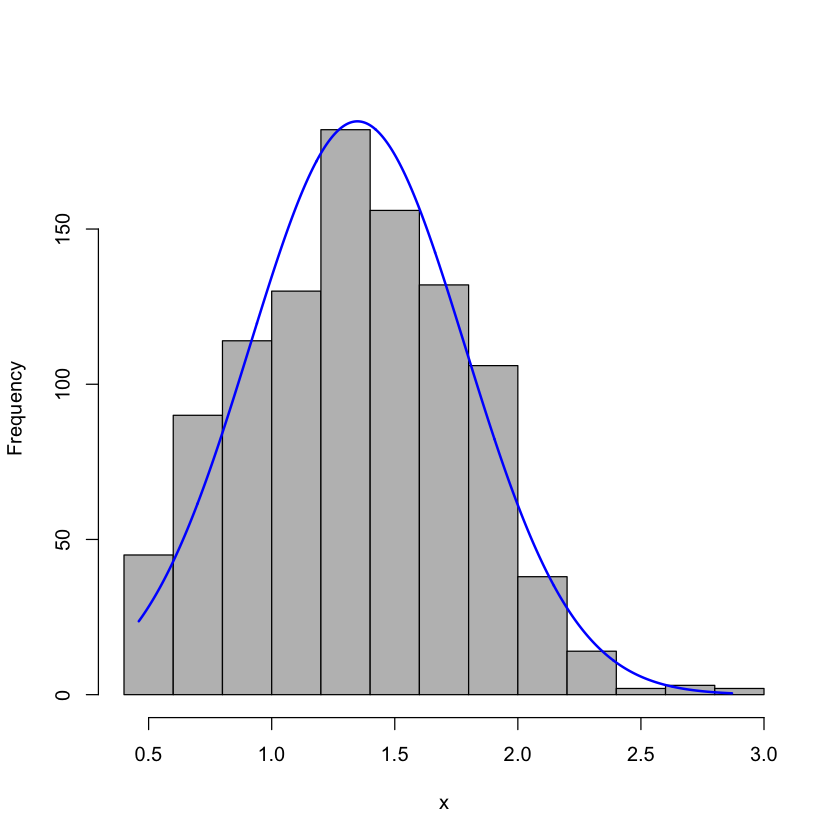

In [9]:
plotNormalHistogram(regions$AveragePrice)

In [6]:
bartlett.test(AveragePrice ~ region, data=regions)


	Bartlett test of homogeneity of variances

data:  AveragePrice by region
Bartlett's K-squared = 142.46, df = 2, p-value < 2.2e-16


In [9]:
fligner.test(AveragePrice ~ region, data=regions)


	Fligner-Killeen test of homogeneity of variances

data:  AveragePrice by region
Fligner-Killeen:med chi-squared = 228.48, df = 2, p-value < 2.2e-16


In [10]:
ANOVA <- lm(AveragePrice ~ region, data=regions)
Anova(ANOVA, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()


,Df,F,Pr(>F)
region,2,38.01388,1.208005e-16
Residuals,1011,NA,NA


In [13]:
pairwise.t.test(regions$AveragePrice, regions$region, p.adjust="bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  regions$AveragePrice and regions$region 

              Indianapolis Orlando
Orlando       2.8e-12      -      
PhoenixTucson 0.024        1.9e-13

P value adjustment method: bonferroni 

In [15]:
regionMeans <- regions %>% group_by(region) %>% summarize(Mean = mean(AveragePrice))
regionMeans

region,Mean
Indianapolis,1.313994
Orlando,1.506213
PhoenixTucson,1.224438
